In [2]:
import numpy as np
import matplotlib.pyplot as plt
import rubidium.D1 as d1
import rubidium.D2 as d2
import scipy as sci

# TODO: magnetic hyperfine splitting

Polarisation of light's effects?

What happens in the regime of super strong fields?

In [3]:
d1.abundance = {"85": 0.01, "87": 0.99}
T = 273.15 + 65  # Temperature in Kelvin
Lc = 0.075  # Length of cell in meters

c = sci.constants.c
delta = np.linspace(-4, 6, 10000)  # detuning in GHz
transdata = d1.Transmission(delta * 1e9, T, Lc)

ndata = d1.Totaln(delta * 1e9, T)

vg = d1.groupVelocity(delta, T, Lc)
transit = Lc / vg
timeshift = transit - Lc / c

(0.0, 1.1)

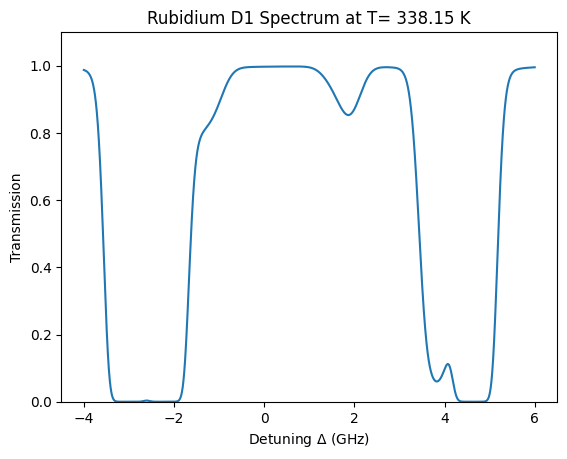

In [4]:
plt.plot(delta, transdata)
plt.title("Rubidium D1 Spectrum at T= " + str(T) + " K")
plt.xlabel(r"Detuning $\Delta$ (GHz)")
plt.ylabel("Transmission")
plt.ylim(0, 1.1)

In [12]:
d2.abundance = {"85": 0.01, "87": 0.99}
T = 273.15 + 45  # Temperature in Kelvin
Lc = 0.075  # Length of cell in meters

c = sci.constants.c
delta = np.linspace(-4, 6, 1000)  # detuning in GHz
transdata = d2.Transmission(delta * 1e9, T, Lc)

ndata = d2.Totaln(delta * 1e9, T)

vg = d2.groupVelocity(delta, T, Lc)
transit = Lc / vg
timeshift = transit - Lc / c

(0.0, 1.1)

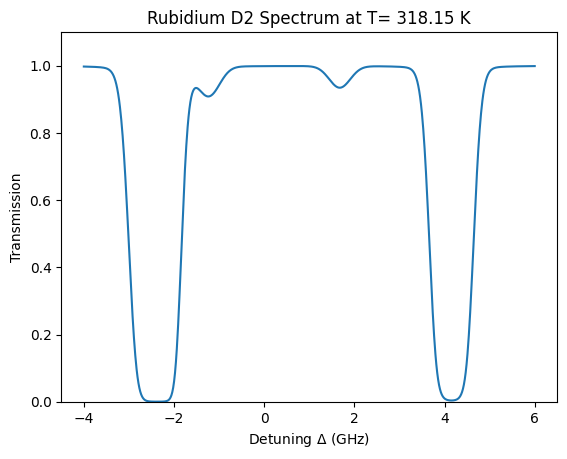

In [13]:
plt.plot(delta, transdata)
plt.title("Rubidium D2 Spectrum at T= " + str(T) + " K")
plt.xlabel(r"Detuning $\Delta$ (GHz)")
plt.ylabel("Transmission")
plt.ylim(0, 1.1)

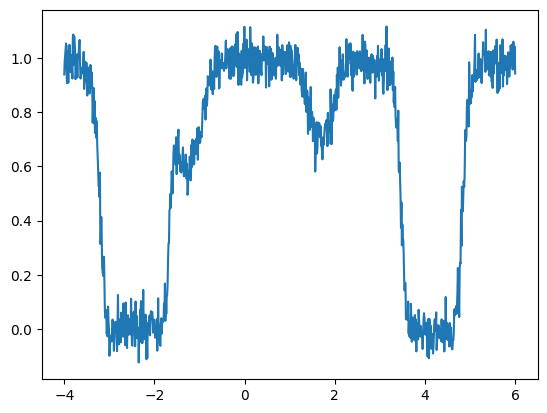

In [7]:
# 1. simulate the noise and add it to the spectrum
# 2. create a model to parse the original spectrum from the noise
# 3. compare model output with ground truth


def add_gaussian_noise(signal, noise_level=0.05):
    """Adds Gaussian (white) noise."""
    noise = np.random.normal(0, noise_level * np.max(signal), size=signal.shape)
    return signal + noise


noisy_trans = add_gaussian_noise(transdata)

plt.plot(delta, noisy_trans)

In [10]:
import torch
import torch.nn as nn

In [11]:
class DenoisingAutoencoder(nn.Module):
    def __init__(self):
        super(DenoisingAutoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(1000, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 100),
            nn.Sigmoid(),
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


# Example usage
model = DenoisingAutoencoder()

In [ ]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

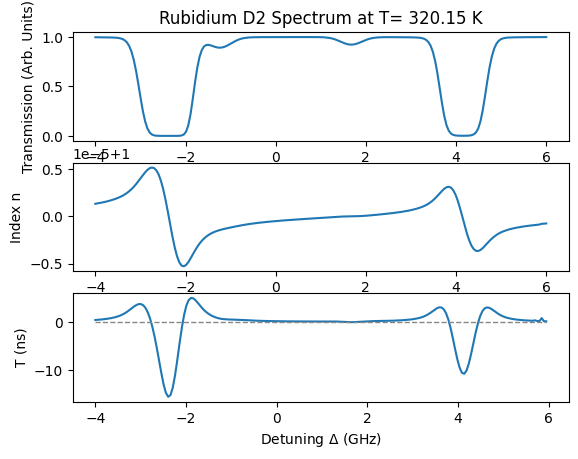

In [16]:
T = 273.15 + 47  # Temperature in Kelvin
Lc = 0.075  # Length of cell in meters
delta = np.linspace(-4, 6, 200)  # detuning in GHz
transdata = d2.Transmission(delta * 1e9, T, Lc)
ndata = d2.Totaln(delta * 1e9, T)

vg = d2.groupVelocity(delta, T, Lc)
transit = Lc / vg
timeshift = transit - Lc / c

plt.subplot(3, 1, 1)
plt.plot(delta, transdata)
plt.title("Rubidium D2 Spectrum at T= " + str(T) + " K")
plt.ylabel("Transmission (Arb. Units)")
plt.subplot(3, 1, 2)
plt.plot(delta, ndata)
plt.ylabel("Index n")
plt.subplot(3, 1, 3)
plt.plot(delta[:-1], timeshift * 1e9)
plt.plot([delta[0], delta[-2]], [0, 0], color="#888888", linestyle="--", linewidth=1)
plt.xlabel(r"Detuning $\Delta$ (GHz)")
plt.ylabel(r"T (ns)")
plt.show()
np.savetxt("D2AbsorptionData.dat", transdata)